# Sales Analysis 

In this notebook I try to answer business questions about 12 months worth of sales data. The data contains hundreds of thousands of electronics store purchases broken down by month, product type, cost, purchase address, etc. The data is provided as 12 seperate csv files. The packages I shall be using are Python Pandas and Python Matpltolib. 

I start by cleaning up some of our data, this involves:

- Dropping Missing(NaN) values from the Dataframe. 
- Removing rows based upon certain conditions. 
- Changing the data type of columns. 

Once the data has been tidied, I will explore 5 business related questions: 

- What was the best month for sales? How much was earned that month?
- What city sold the most product?
- What time should I display advertisemens to maximize the likelihood of customer’s buying product?
- What products are most often sold together?
- What product sold the most? Why I think it sold the most?

Credit: The data and tasks have been provided by a Youtuber: Keith Galli, this purpose of this task was to familiarise myself more with pandas and apply my knowledge to real data. 


### Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os 
import calendar

Data is provided as 12 months of sales data in 12 seperate files, hence I'd like to merge them all into a single dataframe. 

In [2]:
merged_data = pd.DataFrame()

for file in os.listdir('./Sales_Data'):
    new_data = pd.read_csv(f'./Sales_Data/{file}')
    merged_data = pd.concat([merged_data, new_data], ignore_index=True)

# Lets save our merged data as it's useful to have:
merged_data.to_csv('All_Months_Data.csv', index=False)

Read in the 12 months CSV that we have just created:

In [3]:
all_data = pd.read_csv('All_Months_Data.csv')

### Cleaning Data:

First we remove all rows where we have any NaN values and we remove the repeated column names that appear in our data. 

In [4]:

all_data.dropna(axis=0, inplace=True)

all_data = all_data.loc[all_data['Order ID'] != 'Order ID']

all_data = all_data.reset_index(drop=True)

Save our clean Data.

In [5]:
clean_data = all_data.to_csv('CleanData.csv', index=False)

### Tidying Data:

Read in our clean data.

In [6]:
clean_data = pd.read_csv('CleanData.csv')

Some information is lost once merging the data, in particular, the month each data entry is from, hence I'll add a column to state the month (Numerically).

In [7]:
# The following splits up the 'Order Date' of each entry, then accesses the first 2 digits, ie the month and creates a new month column from that. 

clean_data['Month'] = clean_data['Order Date'].str.split('/', expand=True)[0]

clean_data['Month'] = pd.to_numeric(clean_data['Month'])

clean_data


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12
...,...,...,...,...,...,...,...
185945,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",6
185946,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",6
185947,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",6
185948,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",6


#### Question 1: What was the best month for Sales and how much was earned in that Month?

To answer this question, I can use the Pandas GroupBy method to gain statistics about the monthly data. Before I group by the month, I first need a new column to represent the order total, as currently we only have the cost per item and the quantity ordered. Summing the price by month doesn't take into account the multiple quantities

Creating New Columns for Order Total, for readability I shall add the column next to the price. 

In [8]:
totals = clean_data['Quantity Ordered'].multiply(clean_data['Price Each'])

clean_data.insert(4,'Total', totals) 


In [9]:
monthly_totals = clean_data.groupby(['Month']).sum()['Total']

monthly_sorted = pd.DataFrame(monthly_totals).sort_values('Total', ascending=False)

monthly_sorted


,Total
Month,
12,4613443.34
10,3736726.88
4,3390670.24
11,3199603.20
5,3152606.75
3,2807100.38
7,2647775.76
6,2577802.26
8,2244467.88


### Question 1 Answer: From this we can see that the most profitable month was December, with total sales = £4613443.34

Let's Create a plot depicting the monthly totals:

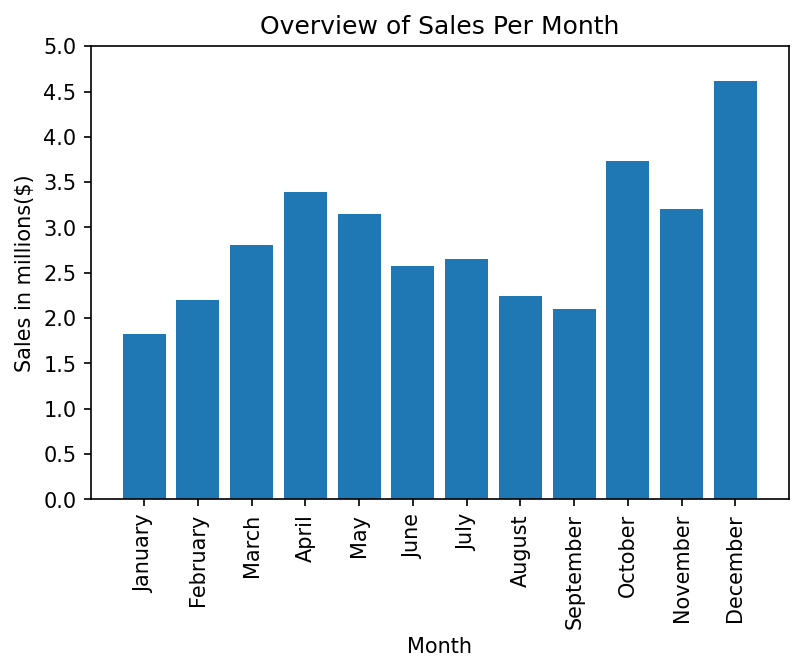

In [10]:
plt.figure(dpi=150)
word_months = [calendar.month_name[i] for i in range(1,13)]
month_totals = monthly_totals.divide(1000000)
plt.xlabel('Month')
plt.ylabel('Sales in millions($)')
plt.title('Overview of Sales Per Month')
plt.bar(word_months,month_totals)
plt.xticks(word_months, rotation=90)
plt.yticks(np.arange(0,5.5,0.5))
plt.show()

### Question 2: What City had the highest number of Sales? 

To answer this question, I need to add a City column, which can be extracted from the Address line in our table. 

In [11]:
# To obtain the city code, I split the address up based upon commas. I then take the final string in that list, which is the City code along with the ZIp code.
# I can then split again based upon whitespace to access just the City Code. 
city_code =  clean_data['Purchase Address'].str.split(', ', expand=True).iloc[:,-1].str.split(' ',expand=True)

clean_data['City (Code)'] = city_code[0] 

#clean_data.groupby(['City (Code)']).sum()